Tutorial Tensorflow Hub Object Detection [URL](https://www.tensorflow.org/hub/tutorials/tf2_object_detection?hl=fr-be&%3Bskip_cache=true&skip_cache=true)

# **Visualization tools**

In [ ]:
# Clone the tensorflow models repository
!git clone --depth 1 https://github.com/tensorflow/models

In [ ]:
%%bash
sudo apt install -y protobuf-compiler
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Reading package lists...
Building dependency tree...
Reading state information...
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-cp37-none-any.whl size=1652954 sha256=947bf12cfdf8160b2beade1c378385509b6fd629e53295e9d35fe146dcf5f0f4
  Stored in directory: /tmp/pip-ephem-wheel-cache-uw8k2nc0/wheels/94/49/4b/39b051683087a22ef7e80ec52152a27249d1a644ccf4e442ea
  Created wheel for avro-python3: filename=avro_python3-1.10.2-cp37-none-any.whl size=44011 sha256=6502e9a39e0882b625106c5798c3bdf886872ecc89feee014dd81447bc726864
  Stored in directory: /root/.cache/pip/wheels/ee/ee/18/c466221ca6900e3efce2f4ea9c329288808679aecdcb2838d3
  Created wheel for future: filename=future-0.18.2-cp37-none-any.whl size=491070 sha256=b816fd01600f486a07bcab167f8a7f65ffd4eb1b9d022d5f1a1ac767372ffe5b
  Stored in directory: /root/



ERROR: multiprocess 0.70.11.1 has requirement dill>=0.3.3, but you'll have dill 0.3.1.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: apache-beam 2.30.0 has requirement avro-python3!=1.9.2,<1.10.0,>=1.8.1, but you'll have avro-python3 1.10.2 which is incompatible.


In [ ]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import ops as utils_ops

In [ ]:
PATH_TO_LABELS = './models/research/object_detection/data/mscoco_label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

In [ ]:
import os
import pathlib

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import io,random, os
import scipy.misc
import zipfile
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from six.moves.urllib.request import urlopen

import tensorflow as tf
import tensorflow_hub as hub


import cv2 as cv
from google.colab import drive


tf.get_logger().setLevel('ERROR')

https://colab.research.google.com/drive/1DofKEdQYaXmDWBzuResXWWvxhLgDeVyl

This example shows uploading the kaggle.json file, the Kaggle API client, and using the Kaggle client to download a dataset.

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Upload kaggle.json in drive

In [ ]:
os.environ['KAGGLE_USERNAME'] = "pypiahmad" #use Your username
os.environ['KAGGLE_KEY'] = "fc8a264a8ff581e93053f1644495824c" #use Your key
!kaggle datasets download -d sshikamaru/car-object-detection

 94% 105M/112M [00:01<00:00, 79.5MB/s] 
100% 112M/112M [00:01<00:00, 82.7MB/s]


In [ ]:
data = zipfile.ZipFile('/content/car-object-detection.zip', 'r')
data.extractall()

In [ ]:
path = r"/content/data/training_images"
random_filename = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
])
path=path+'/'+random_filename
print(path)

/content/data/training_images/vid_4_13740.jpg


In [ ]:
image_np = cv.imread(path) 
image_np = cv.cvtColor(image_np, cv.COLOR_BGR2RGB)
image_np = np.expand_dims(image_np,axis=0)

In [ ]:
image_np.shape

(1, 380, 676, 3)

<function matplotlib.pyplot.show>

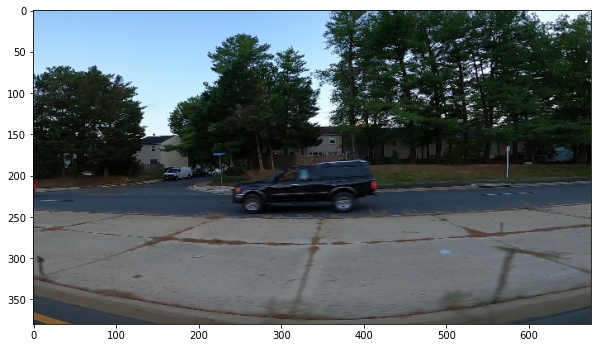

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(image_np[0])
plt.show

In [ ]:
image_tensor = tf.convert_to_tensor(image_np)
image_tensor = tf.cast(image_tensor,tf.uint8)

In [ ]:
# Apply image detector on a single image.
detector = hub.load("https://tfhub.dev/tensorflow/centernet/hourglass_512x512_kpts/1")

In [ ]:
results = detector(image_tensor)

In [ ]:
# tensor
result = {key:value.numpy() for key,value in results.items()}
print(result.keys())

dict_keys(['detection_keypoint_scores', 'detection_classes', 'detection_keypoints', 'num_detections', 'detection_boxes', 'detection_scores'])


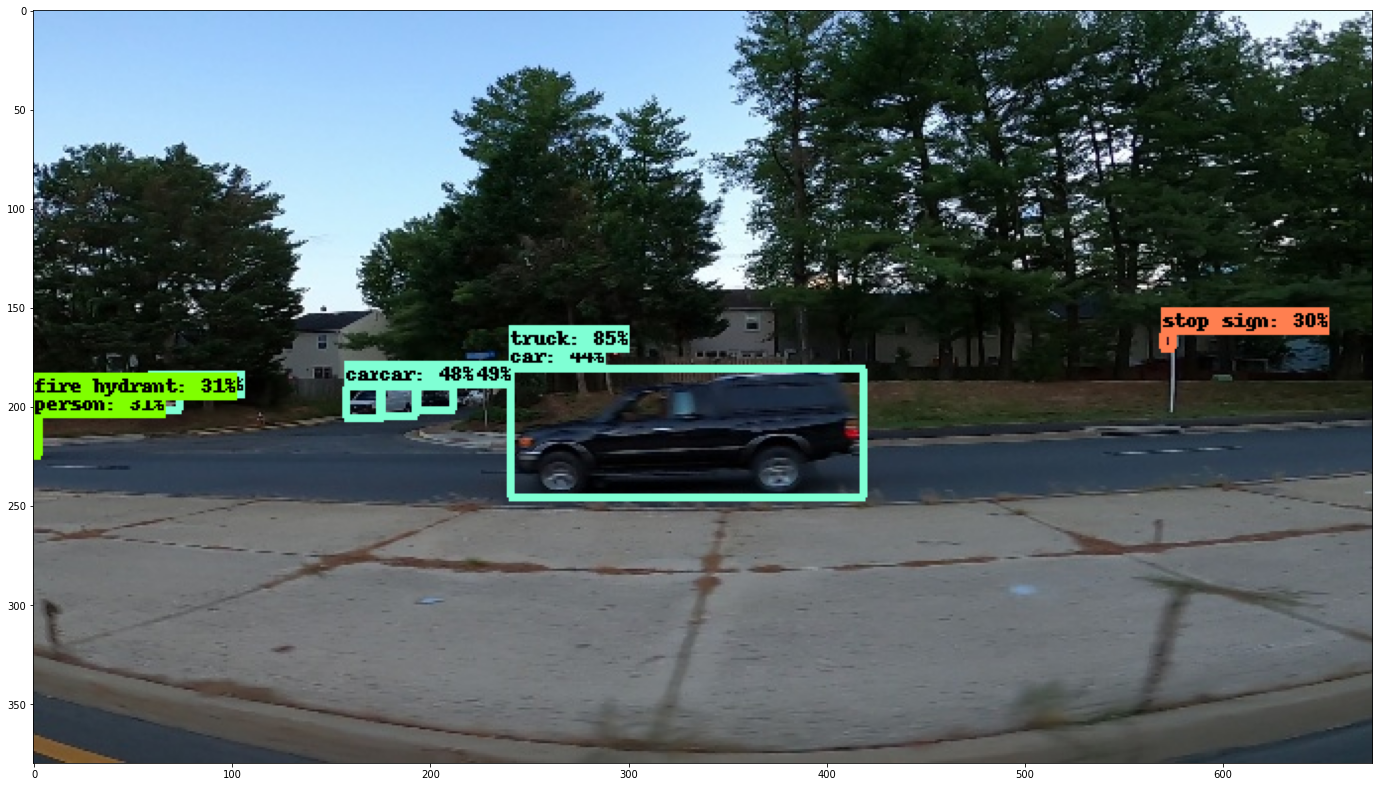

In [ ]:
label_id_offset = 0
image_np_with_detections = image_np.copy()

# Use keypoints if available in detections
keypoints, keypoint_scores = None, None
if 'detection_keypoints' in result:
  keypoints = result['detection_keypoints'][0]
  keypoint_scores = result['detection_keypoint_scores'][0]

viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections[0],
      result['detection_boxes'][0],
      (result['detection_classes'][0] + label_id_offset).astype(int),
      result['detection_scores'][0],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=.30,
      keypoint_scores=keypoint_scores)

plt.figure(figsize=(24,32))
plt.imshow(image_np_with_detections[0])
plt.show()